In [1]:
import subprocess
import os
import re
from tqdm.auto import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shutil
from pathlib import Path

/opt/anaconda3/envs/project/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("result.csv", encoding='utf-8-sig')
df.head()

,musicId,fileName,title,artist,album,genre,genre_grouped,audio_arousal,audio_valence,audio_emotion_quadrant_label,lyrics_emotion_quadrant_label,match_status,emotion_pair,YT id,duration,matched video title,dominant_tempo_variance,tempo_transition_complexity,active_bpm_variance,pitch_high,pitch_low,pitch_range,rms_variance,repeat_area_size,repetition_ratio,repeat_area_size_without_offset,repetition_ratio_without_offset,key,scale,strength,mfcc_0_mean,mfcc_0_std,mfcc_1_mean,mfcc_1_std,mfcc_2_mean,mfcc_2_std,mfcc_3_mean,mfcc_3_std,mfcc_4_mean,mfcc_4_std,mfcc_5_mean,mfcc_5_std,mfcc_6_mean,mfcc_6_std,mfcc_7_mean,mfcc_7_std,mfcc_8_mean,mfcc_8_std,mfcc_9_mean,mfcc_9_std,mfcc_10_mean,mfcc_10_std,mfcc_11_mean,mfcc_11_std,mfcc_12_mean,mfcc_12_std,centroid_mean,centroid_std
0,6,21 Savage - Red Opps,Red Opps,21 Savage,Red Opps,Hip-Hop,Hip-Hop,0.5125,0.3500,Q3,Q2,match,NN,uMUW5t2MJiI,164.0,21 Savage - Red Opps (Official Audio),1.557035,0.144257,411.636609,168.666118,65.406391,103.259727,0.018406,21221185,0.427813,21221185,0.427813,E,minor,0.792114,-68.774550,75.500300,76.65869,42.817276,0.311705,31.222319,23.217747,27.636227,12.219843,20.064571,-5.697848,21.097849,1.285931,15.277291,15.953908,17.257755,-9.440699,14.846778,10.533357,12.852773,2.004004,12.051487,3.299934,10.632957,3.232832,9.367224,2665.729652,1093.967678
1,9,A Boogie Wit Da Hoodie - Timeless,Timeless,A Boogie Wit Da Hoodie,TBA,Hip-Hop,Hip-Hop,0.4500,0.2875,Q3,Q1,mismatch,NP,62I4N2Kjf4U,183.0,Timeless - A Boogie Wit Da Hoodie [Official Au...,5.026038,0.178458,833.157799,122.052642,65.406391,56.646251,0.017464,40980850,0.668347,41549559,0.670326,F,minor,0.858444,-112.974120,90.462074,109.72160,47.585606,19.163363,34.350250,14.983098,24.348375,-6.445553,18.202960,7.618463,15.519949,8.430028,12.230735,10.679407,12.038632,-3.372177,10.777359,3.207154,13.030756,-0.128748,10.019030,10.942307,9.434628,7.098895,9.990342,1913.728754,1013.210948
2,17,Adele - Hello,Hello,Adele,Hello,Pop,Pop,0.8250,0.6750,Q1,Q3,mismatch,PN,4qNRgzHTQsk,292.0,Adele - Hello (Audio),1.418714,0.178154,1022.229609,415.304698,65.406391,349.898306,0.019246,49407888,0.314372,50186019,0.317169,Ab,major,0.921863,-116.283740,135.582860,115.68203,30.249022,11.127066,25.266510,14.440497,17.197256,9.509707,11.854579,8.300445,12.858337,1.456773,9.928441,9.721288,10.685344,1.161453,9.473752,8.310090,10.178933,-3.597765,8.906549,-1.684012,9.201923,-3.258988,9.665615,1734.355866,807.404886
3,19,Adele - Water Under The Bridge,Water Under The Bridge,Adele,25,Pop,Pop,0.7625,0.7500,Q1,Q3,mismatch,PN,hJgRIKMssQY,238.0,Adele - Water Under The Bridge (Audio),4.831712,0.157530,962.283893,117.216055,65.406391,51.809664,0.004301,92810878,0.890410,93669316,0.891210,Eb,major,0.843186,-49.814884,85.417816,105.53239,35.829950,6.094225,17.927639,23.781807,14.668556,14.416689,12.254770,6.257925,13.201438,4.631761,9.878951,9.409986,9.730921,2.601338,10.407900,8.630644,9.580266,0.887758,8.133497,5.430757,7.340950,-3.104878,7.815466,2029.131425,747.292268
4,20,Al Jarreau - We're In This Love Together,We're In This Love Together,Al Jarreau,Breakin' Away,R&B,Pop,0.5500,0.6375,Q4,Q1,match,PP,qFnSA-V4iZc,226.0,We're in This Love Together,4.972761,0.145029,278.333196,175.625645,65.406391,110.219254,0.007809,42937264,0.456955,43532376,0.459252,F,major,0.917657,-123.370430,109.414130,102.48662,33.942886,3.424300,27.253597,25.763777,18.078886,-1.433525,13.061130,1.520673,10.211421,-2.744511,11.912797,1.074549,8.909595,-3.619109,9.403972,5.314159,8.505757,-0.296393,9.331346,1.055715,8.237994,-1.468831,8.593241,2059.462304,759.865467


In [4]:
df["fileName"] = df["artist"].str.strip() + " - " + df["title"].str.strip()

In [6]:
df

,musicId,fileName,title,artist,album,genre,genre_grouped,audio_arousal,audio_valence,audio_emotion_quadrant_label,...,matched video title,dominant_tempo_variance,tempo_transition_complexity,active_bpm_variance,pitch_high,pitch_low,pitch_range,rms_variance,repeat_area_size,repetition_ratio
0,17,Adele - Hello,Hello,Adele,Hello,Pop,Pop,0.825000,0.675000,Q1,...,Adele - Hello (Audio),1.418714,0.178154,1022.229609,415.304698,65.406391,349.898306,0.019246,49407888,0.314372
1,19,Adele - Water Under The Bridge,Water Under The Bridge,Adele,25,Pop,Pop,0.762500,0.750000,Q1,...,Adele - Water Under The Bridge (Audio),4.831712,0.157530,962.283893,117.216055,65.406391,51.809664,0.004301,92810878,0.890410
2,20,Al Jarreau - We're In This Love Together,We're In This Love Together,Al Jarreau,Breakin' Away,R&B,Pop,0.550000,0.637500,Q4,...,We're in This Love Together,4.972761,0.145029,278.333196,175.625645,65.406391,110.219254,0.007809,42937264,0.456955
3,25,Alessia Cara - Scars To Your Beautiful,Scars To Your Beautiful,Alessia Cara,Know-It-All (Deluxe),Pop,Pop,0.761364,0.784091,Q1,...,Alessia Cara - Scars To Your Beautiful (Offici...,3.286687,0.178784,736.321929,802.315790,65.406391,736.909399,0.008888,63914034,0.655490
4,28,Alex Da Kid - Not Easy,Not Easy,Alex Da Kid,Not Easy,Pop,Pop,0.487500,0.575000,Q3,...,"Alex Da Kid - Not Easy ft. X Ambassadors, Wiz ...",5.566201,0.160293,1001.693449,119.264956,65.406391,53.858564,0.011466,64110898,0.570531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,937,Troye Sivan - WILD,WILD,Troye Sivan,WILD,Pop,Pop,0.600000,0.587500,Q3,...,Troye Sivan - WILD (Official Audio) ft. Alessi...,3.895701,0.188009,774.397642,333.457645,65.406391,268.051253,0.015939,67423910,0.724260
161,948,Usher - No Limit [dirty],No Limit [dirty],Usher,No Limit,R&B,Pop,0.487500,0.400000,Q3,...,No Limit,4.112106,0.159049,226.702594,124.186085,65.406391,58.779693,0.017761,33540286,0.348983
162,950,Usher - Yeah,Yeah,Usher,Confessions (Special edition),R&B,Pop,0.700000,0.687500,Q1,...,"Usher feat. Lil Jon, Ludacris - Yeah! (Audio)",4.481167,0.097855,149.797426,633.130775,65.406391,567.724384,0.015390,89380532,0.776542
163,974,ZAYN - Still Got Time,Still Got Time,ZAYN,Still Got Time,Pop,Pop,0.625000,0.587500,Q3,...,Zayn ft. Partynextdoor - STILL GOT TIME (Audio),5.128824,0.192948,481.097025,68.105200,65.406391,2.698808,0.011029,25335650,0.394734


In [6]:
def sanitize_filename(title):
    return re.sub(r'[\\/*:<>|]', "_", title)

In [7]:
df['title'] = df['title'].apply(sanitize_filename)

In [ ]:
def mp3_to_wav(mp3_dir = "downloads", wav_dir = "temp_wavs"):
    os.makedirs(wav_dir, exist_ok=True)
    
    for fname in os.listdir(mp3_dir):
        if fname.endswith(".mp3"):
            mp3_path = os.path.join(mp3_dir, fname)
            wav_fname = Path(fname).stem + ".wav"
            wav_path = os.path.join(wav_dir, wav_fname)
            if not os.path.exists(wav_path):
                subprocess.run([
                    "ffmpeg", "-y", "-i", mp3_path,
                    "-ar", "44100",
                    "-ac", "1",
                    wav_path
                    ])

In [29]:
mp3_to_wav()

ffmpeg version 7.1.1 Copyright (c) 2000-2025 the FFmpeg developers
  built with Apple clang version 17.0.0 (clang-1700.0.13.3)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex

In [30]:
src_dir = 'temp_wavs'

for label in ["0", "1"]:
    os.makedirs(os.path.join(src_dir, label), exist_ok=True)

for _, row in df.iterrows():
    filename = f"{row['artist']} - {row['title']}.wav"
    src_path = os.path.join(src_dir, filename)
    if not os.path.exists(src_path):
        print(f"[경고] {filename} 파일 없음")
        continue

    label = "1" if row["match_status"] == "match" else "0"
    dst_path = os.path.join(src_dir, label, filename)
    shutil.move(src_path, dst_path)

In [31]:
mismatch = Path('temp_wavs/0')
mis_wav_paths = sorted(mismatch.glob('*.wav'))
match = Path('temp_wavs/1')
mat_wav_paths = sorted(match.glob('*.wav'))

In [32]:
len(mis_wav_paths), len(mat_wav_paths)

(200, 200)

In [3]:
import librosa
import librosa.display

In [11]:
df['tempo_transition_complexity'] = 0
df['active_bpm_variance'] = 0
df['pitch_high'] = 0
df['pitch_low'] = 0
df['pitch_range'] = 0
df['rms_variance'] = 0
df['repeat_area_size'] = 0
df['repetition_ratio'] = 0

In [ ]:
def get_onset_tempogram_tempo(audio_path):
  # Load audio
  y, sr = librosa.load(audio_path)
  hop_length = 512

  # Onset strength envelope
  oenv = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length)
  tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sr, hop_length=hop_length) # (템포_bin_개수, 타임_프레임_개수)

  return tempogram

def get_dominant_tempo(tempogram, threshold=0.5):
  active_bpm_per_frame = np.sum(tempogram >= threshold, axis=0)
  active_bpm_variance = np.var(active_bpm_per_frame)

  prev_indices = None
  change_counts = 0
  for t in range(tempogram.shape[1]):
      indices = set(np.where(tempogram[:, t] >= threshold)[0]) # threshold 넘는 템포 bin들의 인덱스
      if prev_indices is not None:
          change = len(indices.symmetric_difference(prev_indices))
          change_counts += change
      prev_indices = indices
  tempo_transition_complexity = change_counts / tempogram.shape[1]

  return tempo_transition_complexity, active_bpm_variance

In [ ]:
from tqdm.auto import tqdm
for path in tqdm(mat_wav_paths, desc="match"):
    filename = path.name.replace(".wav", "").strip()
    tempogram = get_onset_tempogram_tempo(str(path))
    tempo_transition_complexity, active_bpm_variance = get_dominant_tempo(tempogram)
    df.loc[df['fileName'] == filename, 'tempo_transition_complexity'] = tempo_transition_complexity
    df.loc[df['fileName'] == filename, 'active_bpm_variance'] = active_bpm_variance

for path in tqdm(mis_wav_paths, desc="mismatch"):
    filename = path.name.replace(".wav", "").strip()
    tempogram = get_onset_tempogram_tempo(str(path))
    tempo_transition_complexity, active_bpm_variance = get_dominant_tempo(tempogram)
    df.loc[df['fileName'] == filename, 'tempo_transition_complexity'] = tempo_transition_complexity
    df.loc[df['fileName'] == filename, 'active_bpm_variance'] = active_bpm_variance


mismatch: 100%|██████████| 200/200 [00:43<00:00,  4.57it/s]


In [22]:
df

,musicId,fileName,title,artist,album,audio_arousal,audio_valence,audio_emotion_quadrant_label,lyrics_emotion_quadrant_label,match_status,...,duration,matched video title,tempo_transition_complexity,active_bpm_variance,pitch_high,pitch_low,pitch_range,rms_variance,repeat_area_size,repetition_ratio
0,6,21 Savage - Red Opps,Red Opps,21 Savage,Red Opps,0.5125,0.3500,Q3,Q2,match,...,164.0,21 Savage - Red Opps (Official Audio),0.144257,411.636609,0,0,0,0,0,0
1,9,A Boogie Wit Da Hoodie - Timeless,Timeless,A Boogie Wit Da Hoodie,TBA,0.4500,0.2875,Q3,Q1,mismatch,...,183.0,Timeless - A Boogie Wit Da Hoodie [Official Au...,0.178458,833.157799,0,0,0,0,0,0
2,17,Adele - Hello,Hello,Adele,Hello,0.8250,0.6750,Q1,Q3,mismatch,...,292.0,Adele - Hello (Audio),0.178154,1022.229609,0,0,0,0,0,0
3,19,Adele - Water Under The Bridge,Water Under The Bridge,Adele,25,0.7625,0.7500,Q1,Q3,mismatch,...,238.0,Adele - Water Under The Bridge (Audio),0.157530,962.283893,0,0,0,0,0,0
4,20,Al Jarreau - We're In This Love Together,We're In This Love Together,Al Jarreau,Breakin' Away,0.5500,0.6375,Q4,Q1,match,...,226.0,We're in This Love Together,0.145029,278.333196,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,970,Travis Scott - Pick Up the Phone,Pick Up the Phone,Travis Scott,Pick Up the Phone,0.7000,0.4875,Q2,Q1,mismatch,...,252,pick up the phone,0.136769,752.106723,0,0,0,0,0,0
396,974,ZAYN - Still Got Time,Still Got Time,ZAYN,Still Got Time,0.6250,0.5875,Q3,Q4,mismatch,...,187.0,Zayn ft. Partynextdoor - STILL GOT TIME (Audio),0.192948,481.097025,0,0,0,0,0,0
397,979,Zac Brown Band - My Old Man,My Old Man,Zac Brown Band,My Old Man,0.3625,0.5125,Q3,Q4,mismatch,...,222.0,My Old Man - Zac Brown Band (Lyrics),0.157961,638.966489,0,0,0,0,0,0
398,983,Zara Larsson - Ain't My Fault,Ain't My Fault,Zara Larsson,Ain't My Fault,0.7750,0.5000,Q2,Q1,mismatch,...,224.0,Zara Larsson - Ain't My Fault (Official Audio),0.139822,1079.896014,0,0,0,0,0,0


In [ ]:
def check_rms_variance(audio_path):
    y, sr = librosa.load(audio_path)

    rms = librosa.feature.rms(y=y).flatten() # (1=rms_val_개수, 타임_프레임_개수)
    rms = rms[~np.isnan(rms) & ~np.isinf(rms)]

    if len(rms) == 0:
        return 0.0

    rms_var = np.var(rms)
    return rms_var

In [63]:
for path in tqdm(mat_wav_paths, desc="match"):
    filename = path.name.replace(".wav", "").strip()
    rms_variance = check_rms_variance(str(path))
    df.loc[df['fileName'] == filename, 'rms_variance'] = rms_variance

for path in tqdm(mis_wav_paths, desc="mismatch"):
    filename = path.name.replace(".wav", "").strip()
    rms_variance = check_rms_variance(str(path))
    df.loc[df['fileName'] == filename, 'rms_variance'] = rms_variance

mismatch: 100%|██████████| 200/200 [00:09<00:00, 20.18it/s]


In [65]:
df.to_csv("result.csv", index=False)

In [29]:
def get_pitch_range(audio_path):
  y, sr = librosa.load(audio_path)

  f0, _, _ = librosa.pyin(
      y,
      fmin=librosa.note_to_hz('C2'),
      fmax=librosa.note_to_hz('C7'),
      sr=sr
  )

  # NaN 제거
  f0 = f0[~np.isnan(f0)]

  # IQR 기반 이상치 제거
  q1 = np.percentile(f0, 25)
  q3 = np.percentile(f0, 75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  
  f0_filtered = f0[(f0 >= lower_bound) & (f0 <= upper_bound)]
  pitch_range = np.max(f0_filtered) - np.min(f0_filtered)

  return np.max(f0_filtered), np.min(f0_filtered), pitch_range

In [37]:
for path in tqdm(mat_wav_paths, desc="match"):
    filename = path.name.replace(".wav", "").strip()
    pitch_high, pitch_low, pitch_range = get_pitch_range(str(path))
    df.loc[df['fileName'] == filename, 'pitch_high'] = pitch_high
    df.loc[df['fileName'] == filename, 'pitch_low'] = pitch_low
    df.loc[df['fileName'] == filename, 'pitch_range'] = pitch_range

for path in tqdm(mis_wav_paths, desc="mismatch"):
    filename = path.name.replace(".wav", "").strip()
    pitch_high, pitch_low, pitch_range = get_pitch_range(str(path))
    df.loc[df['fileName'] == filename, 'pitch_high'] = pitch_high
    df.loc[df['fileName'] == filename, 'pitch_low'] = pitch_low
    df.loc[df['fileName'] == filename, 'pitch_range'] = pitch_range

mismatch: 100%|██████████| 200/200 [1:11:02<00:00, 21.31s/it]


In [36]:
problem_df = df[
    (df['pitch_high'] == 0) &
    (df['pitch_low'] == 0) &
    (df['pitch_range'] == 0)
]
len(problem_df)

200

In [38]:
df.head(50)

,musicId,fileName,title,artist,album,audio_arousal,audio_valence,audio_emotion_quadrant_label,lyrics_emotion_quadrant_label,match_status,...,duration,matched video title,tempo_transition_complexity,active_bpm_variance,pitch_high,pitch_low,pitch_range,rms_variance,repeat_area_size,repetition_ratio
0,6,21 Savage - Red Opps,Red Opps,21 Savage,Red Opps,0.512500,0.350000,Q3,Q2,match,...,164.0,21 Savage - Red Opps (Official Audio),0.144257,411.636609,168.666118,65.406391,103.259727,0.018406,0,0
1,9,A Boogie Wit Da Hoodie - Timeless,Timeless,A Boogie Wit Da Hoodie,TBA,0.450000,0.287500,Q3,Q1,mismatch,...,183.0,Timeless - A Boogie Wit Da Hoodie [Official Au...,0.178458,833.157799,122.052642,65.406391,56.646251,0.004744,0,0
2,17,Adele - Hello,Hello,Adele,Hello,0.825000,0.675000,Q1,Q3,mismatch,...,292.0,Adele - Hello (Audio),0.178154,1022.229609,415.304698,65.406391,349.898306,0.004744,0,0
3,19,Adele - Water Under The Bridge,Water Under The Bridge,Adele,25,0.762500,0.750000,Q1,Q3,mismatch,...,238.0,Adele - Water Under The Bridge (Audio),0.157530,962.283893,117.216055,65.406391,51.809664,0.004744,0,0
4,20,Al Jarreau - We're In This Love Together,We're In This Love Together,Al Jarreau,Breakin' Away,0.550000,0.637500,Q4,Q1,match,...,226.0,We're in This Love Together,0.145029,278.333196,175.625645,65.406391,110.219254,0.007809,0,0
5,21,Alan Walker - Faded,Faded,Alan Walker,Faded,0.862500,0.775000,Q1,Q3,mismatch,...,213.0,Alan Walker - Faded (Lyrics),0.159699,1111.102969,187.146775,65.406391,121.740384,0.004744,0,0
6,25,Alessia Cara - Scars To Your Beautiful,Scars To Your Beautiful,Alessia Cara,Know-It-All (Deluxe),0.761364,0.784091,Q1,Q1,match,...,230.0,Alessia Cara - Scars To Your Beautiful (Offici...,0.178784,736.321929,802.315790,65.406391,736.909399,0.008888,0,0
7,28,Alex Da Kid - Not Easy,Not Easy,Alex Da Kid,Not Easy,0.487500,0.575000,Q3,Q3,match,...,247.0,"Alex Da Kid - Not Easy ft. X Ambassadors, Wiz ...",0.160293,1001.693449,119.264956,65.406391,53.858564,0.011466,0,0
8,32,Andra Day - Rise Up,Rise Up,Andra Day,Rise Up,0.575000,0.387500,Q3,Q1,mismatch,...,255.0,Andra Day - Rise Up [Audio],0.226118,1107.748631,921.618828,65.406391,856.212437,0.004744,0,0
9,33,Andy Grammer - Fresh Eyes,Fresh Eyes,Andy Grammer,Fresh Eyes,0.637500,0.750000,Q4,Q1,match,...,198.0,"Andy Grammer ""Fresh Eyes""",0.047005,17.790768,263.141147,65.406391,197.734755,0.015809,0,0


In [ ]:
def check_repetition_ratio(audio_path, threshold=0.8, hop_length=512):
    # 1. Load audio
    y, sr = librosa.load(audio_path)

    # 2. Extract chroma feature
    chroma = librosa.feature.chroma_cqt(y=y, sr=sr, hop_length=hop_length)  # (12, T)

    # 3. Cosine similarity between time frames
    similarity_matrix = cosine_similarity(chroma.T)  # (T, T)
    T = similarity_matrix.shape[0]

    # 4. Valid repeat: high similarity
    is_valid_repeat = similarity_matrix > threshold
    repeated_area = np.sum(is_valid_repeat)
    
    total_possible = similarity_matrix.size
    repetition_ratio_value = repeated_area / total_possible if total_possible > 0 else 0

    return repeated_area, repetition_ratio_value

In [16]:
from skimage.transform import resize

def get_resized_ssm(audio_path, target_size=128, threshold=0.8):
    y, sr = librosa.load(audio_path)

    chroma = librosa.feature.chroma_cqt(y=y, sr=sr) # (12, T)
    similarity_matrix = cosine_similarity(chroma.T) # (T, T)

    is_repeat = (similarity_matrix > threshold)

    resized_mask = resize(is_repeat.astype(float), (target_size, target_size),
                          mode='reflect', anti_aliasing=True, preserve_range=True)

    return resized_mask

def plot_silimilarity_matrix(similarity_matrix, save_path=None):
    plt.figure(figsize=(6, 5))
    plt.imshow(similarity_matrix, origin='lower', aspect='auto', cmap='magma', interpolation='nearest')
    plt.title("Mean Self-Similarity Matrix")
    plt.colorbar(label='Repetition Presence Probability')
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300)
        print(f"Saved visualization to: {save_path}")
    
    plt.close()

In [6]:
from skimage.transform import resize
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE

def get_resized_ssm(audio_path, target_size=128, threshold=0.8):
    y, sr = librosa.load(audio_path)

    chroma = librosa.feature.chroma_cqt(y=y, sr=sr) # (12, T)
    similarity_matrix = cosine_similarity(chroma.T) # (T, T)

    is_repeat = (similarity_matrix > threshold)

    resized_mask = resize(is_repeat.astype(float), (target_size, target_size),
                          mode='reflect', anti_aliasing=True, preserve_range=True)

    return resized_mask

embedding_imgs = []
labels = []

for label in ["0", "1", "2", "3"]:
    dir_path = os.path.join("temp_wavs", label)

    for fname in tqdm(os.listdir(dir_path)):
        if not fname.endswith(".wav"):
            continue
        path = os.path.join(dir_path, fname)
        matrix = get_resized_ssm(path) # (128, 128)
        embedding_imgs.append(matrix[None, :, :]) # (1, 128, 128)

        labels.append(label)

embedding_imgs = np.array(embedding_imgs) # (B, 1, 128, 128)

  0%|          | 0/100 [00:00<?, ?it/s]/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
  1%|          | 1/100 [00:13<21:36, 13.10s/it]/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
  2%

/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/opt/a

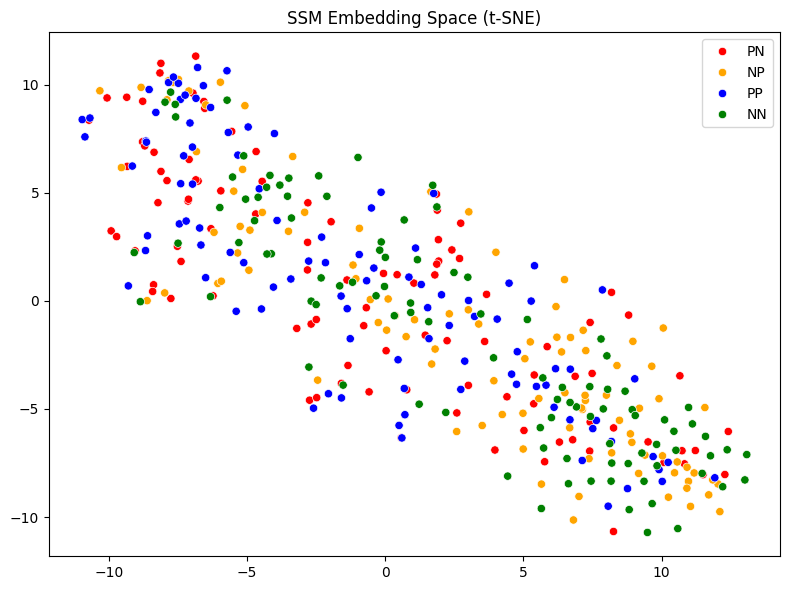

In [88]:
ssm_tensor = torch.tensor(embedding_imgs, dtype=torch.float32)  # (B, 128, 128)
ssm_flattened = ssm_tensor.view(ssm_tensor.shape[0], -1)        # (B, 16384)

tsne_fl = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_result_fl = tsne_fl.fit_transform(ssm_flattened.numpy())

pretty_labels = [label_map[label] for label in labels]

plt.figure(figsize=(8, 6))
sns.scatterplot(x=tsne_result_fl[:, 0], y=tsne_result_fl[:, 1], hue=pretty_labels, palette=color_dict)
plt.title("SSM Embedding Space (t-SNE)")
plt.tight_layout()
plt.show()

In [19]:
df = pd.read_csv("result.csv")

pop_indices = []

for i, filename in enumerate(filenames):
    row = df[df.apply(
        lambda r: f"{r['artist']} - {r['title']}.wav" == filename,
        axis=1
    )]
    
    if not row.empty and row.iloc[0]["genre_grouped"] == "Pop":
        pop_indices.append(i)

# Pop
pop_imgs = embedding_imgs[pop_indices]
pop_labels = [labels[i] for i in pop_indices]
pop_files = [filenames[i] for i in pop_indices]


In [20]:
len(pop_imgs)

165

In [9]:
import torch
import torch.nn as nn

class SSM_AutoEncoder(nn.Module):
    def __init__(self, bottleneck_dim=64):
        super().__init__()

        self.encoder = nn.Sequential(
            nn.Conv2d(1, 8, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(8, 16, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
        )

        self.bottleneck = nn.Linear(32*16*16, bottleneck_dim)

        self.unbottleneck = nn.Linear(bottleneck_dim, 32*16*16)

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(32, 16, kernel_size=4, stride = 2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 8, kernel_size=4, stride = 2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(8, 1, kernel_size=4, stride = 2, padding=1),
            nn.ReLU(),
            nn.Sigmoid()
        )
    
    def forward(self, x): # ssm_img (B, 1, 128, 128)
        encoded = self.encoder(x) # (B, 32, 16, 16)
        z = self.bottleneck(encoded.view(x.size(0), -1)) # (B, 32*16*16)
        x_hat =self.unbottleneck(z).view(-1, 32, 16, 16)
        decoded = self.decoder(x_hat)
        return decoded, z

In [ ]:
import umap

ssm_tensor = torch.tensor(embedding_imgs, dtype=torch.float32)

model = SSM_AutoEncoder(bottleneck_dim=64)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.MSELoss()

for epoch in range(30):
    model.train()
    output, z = model(ssm_tensor) # (128, 128) SSM, bottleneck layer
    loss = loss_fn(output, ssm_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1} - Loss: {loss.item():.4f}")

model.eval()
with torch.no_grad():
    _, z = model(ssm_tensor) # (B, 64)
    z_np = z.detach().numpy()

reducer = umap.UMAP(n_components=2, random_state=42)
umap_result = reducer.fit_transform(z_np)

Epoch 1 - Loss: 0.0806
Epoch 2 - Loss: 0.0806
Epoch 3 - Loss: 0.0804
Epoch 4 - Loss: 0.0802
Epoch 5 - Loss: 0.0797
Epoch 6 - Loss: 0.0789
Epoch 7 - Loss: 0.0780
Epoch 8 - Loss: 0.0772
Epoch 9 - Loss: 0.0764
Epoch 10 - Loss: 0.0755
Epoch 11 - Loss: 0.0743
Epoch 12 - Loss: 0.0728
Epoch 13 - Loss: 0.0712
Epoch 14 - Loss: 0.0697
Epoch 15 - Loss: 0.0679
Epoch 16 - Loss: 0.0660
Epoch 17 - Loss: 0.0650
Epoch 18 - Loss: 0.0637
Epoch 19 - Loss: 0.0630
Epoch 20 - Loss: 0.0621
Epoch 21 - Loss: 0.0617
Epoch 22 - Loss: 0.0608
Epoch 23 - Loss: 0.0607
Epoch 24 - Loss: 0.0601
Epoch 25 - Loss: 0.0601
Epoch 26 - Loss: 0.0598
Epoch 27 - Loss: 0.0597
Epoch 28 - Loss: 0.0596
Epoch 29 - Loss: 0.0593
Epoch 30 - Loss: 0.0593


/opt/anaconda3/envs/project/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [ ]:
import umap

ssm_tensor = torch.tensor(pop_imgs, dtype=torch.float32)

model = SSM_AutoEncoder(bottleneck_dim=64)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.MSELoss()

for epoch in range(30):
    model.train()
    output, z = model(ssm_tensor) # (128, 128) SSM, bottleneck layer
    loss = loss_fn(output, ssm_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1} - Loss: {loss.item():.4f}")

model.eval()
with torch.no_grad():
    _, z = model(ssm_tensor) # (B, 64)
    z_np = z.detach().numpy()

pop_reducer = umap.UMAP(n_components=2, random_state=42)
umap_result_pop = pop_reducer.fit_transform(z_np)

Epoch 1 - Loss: 0.0897
Epoch 2 - Loss: 0.0897
Epoch 3 - Loss: 0.0897
Epoch 4 - Loss: 0.0896
Epoch 5 - Loss: 0.0896
Epoch 6 - Loss: 0.0894
Epoch 7 - Loss: 0.0892
Epoch 8 - Loss: 0.0889
Epoch 9 - Loss: 0.0884
Epoch 10 - Loss: 0.0878
Epoch 11 - Loss: 0.0872
Epoch 12 - Loss: 0.0868
Epoch 13 - Loss: 0.0863
Epoch 14 - Loss: 0.0859
Epoch 15 - Loss: 0.0855
Epoch 16 - Loss: 0.0851
Epoch 17 - Loss: 0.0848
Epoch 18 - Loss: 0.0846
Epoch 19 - Loss: 0.0845
Epoch 20 - Loss: 0.0843
Epoch 21 - Loss: 0.0842
Epoch 22 - Loss: 0.0840
Epoch 23 - Loss: 0.0838
Epoch 24 - Loss: 0.0836
Epoch 25 - Loss: 0.0834
Epoch 26 - Loss: 0.0831
Epoch 27 - Loss: 0.0827
Epoch 28 - Loss: 0.0820
Epoch 29 - Loss: 0.0809
Epoch 30 - Loss: 0.0793


/opt/anaconda3/envs/project/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [ ]:
from sklearn.manifold import TSNE

ssm_tensor = torch.tensor(embedding_imgs, dtype=torch.float32)

model = SSM_AutoEncoder(bottleneck_dim=64)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.MSELoss()

for epoch in range(30):
    model.train()
    output, z = model(ssm_tensor) # (128, 128) SSM, bottleneck layer
    loss = loss_fn(output, ssm_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1} - Loss: {loss.item():.4f}")

model.eval()
with torch.no_grad():
    _, z = model(ssm_tensor) # (B, 64)
    z_np = z.detach().numpy()

torch.save(model.state_dict(), "ssm_autoencoder_all.pt")

np.save("z_np_all.npy", z_np)

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_result = tsne.fit_transform(z_np)

Epoch 1 - Loss: 0.0807
Epoch 2 - Loss: 0.0807
Epoch 3 - Loss: 0.0806
Epoch 4 - Loss: 0.0806
Epoch 5 - Loss: 0.0804
Epoch 6 - Loss: 0.0802
Epoch 7 - Loss: 0.0798
Epoch 8 - Loss: 0.0792
Epoch 9 - Loss: 0.0786
Epoch 10 - Loss: 0.0781
Epoch 11 - Loss: 0.0777
Epoch 12 - Loss: 0.0770
Epoch 13 - Loss: 0.0761
Epoch 14 - Loss: 0.0751
Epoch 15 - Loss: 0.0741
Epoch 16 - Loss: 0.0729
Epoch 17 - Loss: 0.0712
Epoch 18 - Loss: 0.0692
Epoch 19 - Loss: 0.0672
Epoch 20 - Loss: 0.0653
Epoch 21 - Loss: 0.0638
Epoch 22 - Loss: 0.0628
Epoch 23 - Loss: 0.0622
Epoch 24 - Loss: 0.0619
Epoch 25 - Loss: 0.0609
Epoch 26 - Loss: 0.0606
Epoch 27 - Loss: 0.0603
Epoch 28 - Loss: 0.0598
Epoch 29 - Loss: 0.0598
Epoch 30 - Loss: 0.0594


/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/opt/a

In [ ]:
from sklearn.manifold import TSNE

ssm_tensor = torch.tensor(pop_imgs, dtype=torch.float32)

model = SSM_AutoEncoder(bottleneck_dim=64)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.MSELoss()

for epoch in range(30):
    model.train()
    output, z = model(ssm_tensor) # (128, 128) SSM, bottleneck layer
    loss = loss_fn(output, ssm_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1} - Loss: {loss.item():.4f}")

model.eval()
with torch.no_grad():
    _, z = model(ssm_tensor) # (B, 64)
    z_np = z.detach().numpy()

torch.save(model.state_dict(), "ssm_autoencoder_pop.pt")

np.save("z_np_pop.npy", z_np)

tsne_pop = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_result_pop = tsne_pop.fit_transform(z_np)

Epoch 1 - Loss: 0.0894
Epoch 2 - Loss: 0.0894
Epoch 3 - Loss: 0.0893
Epoch 4 - Loss: 0.0891
Epoch 5 - Loss: 0.0888
Epoch 6 - Loss: 0.0883
Epoch 7 - Loss: 0.0879
Epoch 8 - Loss: 0.0876
Epoch 9 - Loss: 0.0871
Epoch 10 - Loss: 0.0865
Epoch 11 - Loss: 0.0858
Epoch 12 - Loss: 0.0851
Epoch 13 - Loss: 0.0843
Epoch 14 - Loss: 0.0833
Epoch 15 - Loss: 0.0822
Epoch 16 - Loss: 0.0807
Epoch 17 - Loss: 0.0789
Epoch 18 - Loss: 0.0768
Epoch 19 - Loss: 0.0749
Epoch 20 - Loss: 0.0732
Epoch 21 - Loss: 0.0722
Epoch 22 - Loss: 0.0720
Epoch 23 - Loss: 0.0715
Epoch 24 - Loss: 0.0706
Epoch 25 - Loss: 0.0701
Epoch 26 - Loss: 0.0690
Epoch 27 - Loss: 0.0681
Epoch 28 - Loss: 0.0675
Epoch 29 - Loss: 0.0667
Epoch 30 - Loss: 0.0666


/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/opt/a

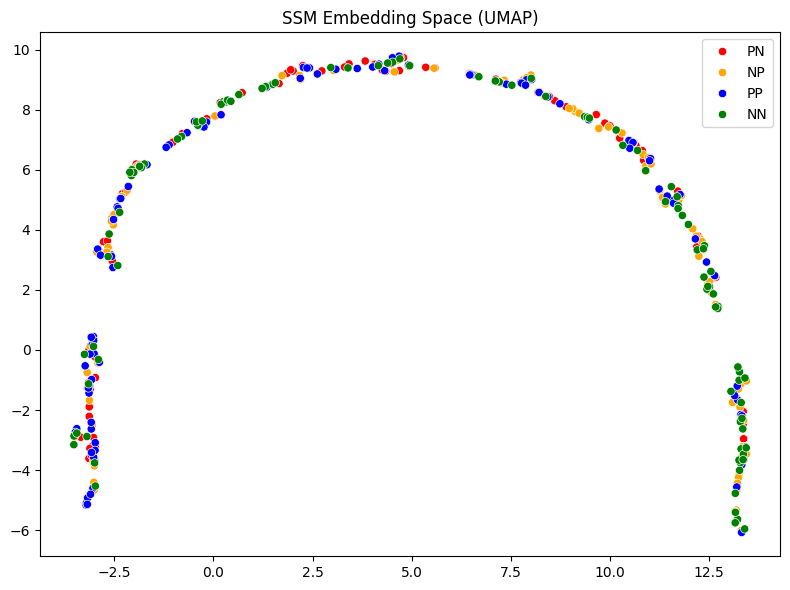

In [77]:
import seaborn as sns

label_map = {
    "0": "PN",
    "1": "NP",
    "2": "PP",
    "3": "NN"
}

color_dict = {
    "PN": "red",
    "NP": "orange",
    "PP": "blue",
    "NN": "green"
}

pretty_labels = [label_map[label] for label in labels]

plt.figure(figsize=(8, 6))
sns.scatterplot(x=umap_result[:, 0], y=umap_result[:, 1], hue=pretty_labels, palette=color_dict)
plt.title("SSM Embedding Space (UMAP)")
plt.tight_layout()
plt.show()

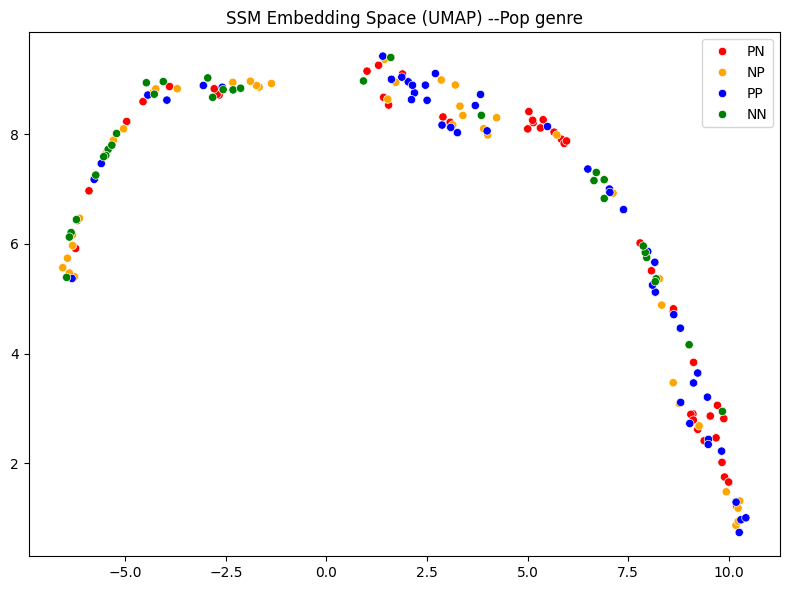

In [83]:
pretty_labels = [label_map[label] for label in pop_labels]

plt.figure(figsize=(8, 6))
sns.scatterplot(x=umap_result_pop[:, 0], y=umap_result_pop[:, 1], hue=pretty_labels, palette=color_dict)
plt.title("SSM Embedding Space (UMAP) --Pop genre")
plt.tight_layout()
plt.show()

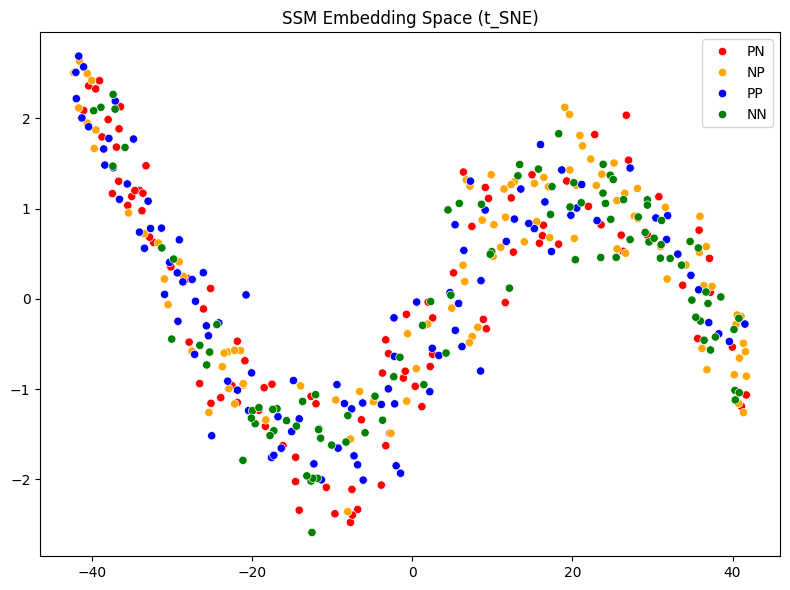

In [84]:
pretty_labels = [label_map[label] for label in labels]

plt.figure(figsize=(8, 6))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=pretty_labels, palette=color_dict)
plt.title("SSM Embedding Space (t_SNE)")
plt.tight_layout()
plt.show()

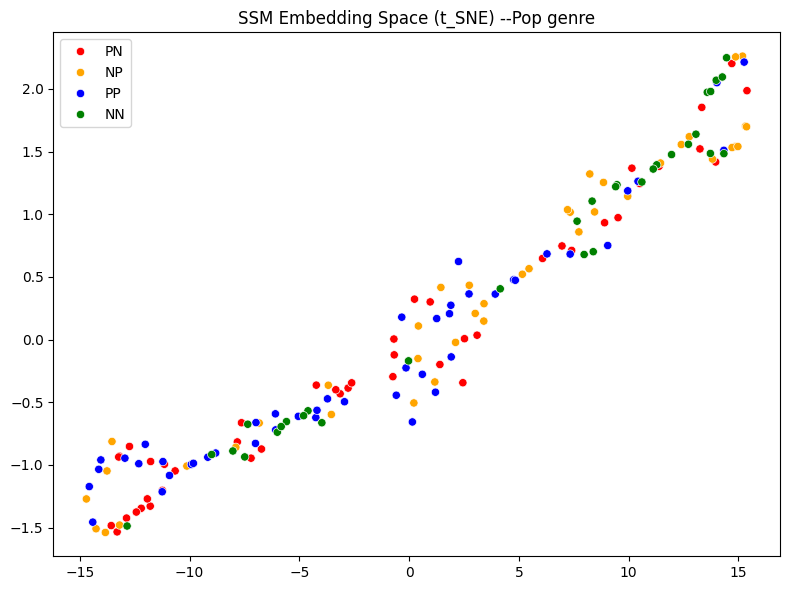

In [86]:
pretty_labels = [label_map[label] for label in pop_labels]

plt.figure(figsize=(8, 6))
sns.scatterplot(x=tsne_result_pop[:, 0], y=tsne_result_pop[:, 1], hue=pretty_labels, palette=color_dict)
plt.title("SSM Embedding Space (t_SNE) --Pop genre")
plt.tight_layout()
plt.show()

In [5]:
src_dir = 'temp_wavs'

label_map = {
    "PN": "0",
    "NP": "1",
    "PP": "2",
    "NN": "3",
}

for label in label_map.values():
    os.makedirs(os.path.join(src_dir, label), exist_ok=True)

# 기존 2분류 폴더(0: mismatch, 1: match) 내부 순회
for old_label in ["0", "1"]:
    folder_path = os.path.join(src_dir, old_label)

    for fname in os.listdir(folder_path):
        if not fname.endswith(".wav"):
            continue

        filename = fname.strip()
        src_path = os.path.join(folder_path, filename)

        row = df[df.apply(
            lambda r: f"{r['artist']} - {r['title']}.wav" == filename,
            axis=1
        )]

        if row.empty:
            print(f"[경고] 메타데이터에서 {filename} 못 찾음")
            continue

        emotion = row.iloc[0]["emotion_pair"]
        if emotion not in label_map:
            print(f"[경고] emotion_pair '{emotion}' 미등록")
            continue

        new_label = label_map[emotion]
        dst_path = os.path.join(src_dir, new_label, filename)
        shutil.move(src_path, dst_path)

In [18]:
n_class = 4

for n in range(n_class):
    src_dir = f"temp_wavs/{n}"
    resized_masks = []
    target_size = 128

    for fname in tqdm(os.listdir(src_dir)):
        if fname.endswith(".wav"):
            path = os.path.join(src_dir, fname)
            resized_matrix = get_resized_ssm(path, target_size)
            resized_masks.append(resized_matrix)

    # 평균 마스크 시각화
    mean_matrix = np.mean(resized_masks, axis=0)
    plot_silimilarity_matrix(mean_matrix, f"{n}.png")

  0%|          | 0/45 [00:00<?, ?it/s]/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
  2%|▏         | 1/45 [00:07<05:23,  7.34s/it]/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
  4%|▍

Saved visualization to: 0.png


  0%|          | 0/42 [00:00<?, ?it/s]/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
  2%|▏         | 1/42 [00:12<08:16, 12.12s/it]/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
  5%|▍

Saved visualization to: 1.png


  0%|          | 0/46 [00:00<?, ?it/s]/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
  2%|▏         | 1/46 [00:11<08:17, 11.05s/it]/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
  4%|▍

Saved visualization to: 2.png


  0%|          | 0/32 [00:00<?, ?it/s]/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
  3%|▎         | 1/32 [00:14<07:14, 14.00s/it]/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/project/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
  6%|▋

Saved visualization to: 3.png


In [ ]:
src_dir = "temp_wavs"

# 0~3 폴더 및 temp_wavs/ 내부의 .wav 파일들 모두 순회
search_dirs = [src_dir] + [os.path.join(src_dir, str(i)) for i in range(4)]

for folder in search_dirs:
    for fname in os.listdir(folder):
        if not fname.endswith(".wav"):
            continue

        filepath = os.path.join(folder, fname)

        row = df[df.apply(
            lambda r: f"{r['artist']} - {r['title']}.wav" == fname,
            axis=1
        )]

        if row.empty:
            print(f"[경고] {fname} 파일 없음")
            continue

        match_status = row.iloc[0]["match_status"]
        if match_status not in ["match", "mismatch"]:
            print(f"[경고] 이상한 match_status: {match_status}")
            continue

        dst_label = "1" if match_status == "match" else "0"
        dst_path = os.path.join(src_dir, dst_label, fname)
        shutil.move(filepath, dst_path)


In [ ]:
def check_tempo_variance(audio_path):
    y, sr = librosa.load(audio_path)
    hop_length = 512

    onset_strength_seq = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length)
    tempogram = librosa.feature.tempogram(onset_envelope=onset_strength_seq, sr=sr, hop_length=hop_length) # (num_bins, num_frames)

    tempos = librosa.tempo_frequencies(tempogram.shape[0], sr=sr, hop_length=hop_length) # tempo bin index → bpm
    dominant_indices = np.argmax(tempogram[1:], axis=0) + 1
    dominant_tempos = tempos[dominant_indices]

    dominant_tempos = dominant_tempos[(~np.isnan(dominant_tempos)) & (~np.isinf(dominant_tempos))]
    dominant_tempos = np.log2(dominant_tempos + 1e-6)

    if len(dominant_tempos) == 0:
        return 0.0

    dominant_tempo_variance = np.var(dominant_tempos)

    return dominant_tempo_variance

In [44]:
for path in tqdm(mat_wav_paths, desc="match"):
    filename = path.name.replace(".wav", "").strip()
    tempo_var = check_tempo_variance(str(path))
    df.loc[df['fileName'] == filename, 'dominant_tempo_variance'] = tempo_var

for path in tqdm(mis_wav_paths, desc="mismatch"):
    filename = path.name.replace(".wav", "").strip()
    tempo_var = check_tempo_variance(str(path))
    df.loc[df['fileName'] == filename, 'dominant_tempo_variance'] = tempo_var

mismatch: 100%|██████████| 200/200 [00:38<00:00,  5.22it/s]


In [60]:
def get_mfcc_summary(audio_path):
    y, sr = librosa.load(audio_path)
    
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfcc_mean = np.mean(mfcc, axis=1)
    mfcc_std = np.std(mfcc, axis=1)

    return mfcc_mean, mfcc_std

In [61]:
for path in tqdm(mat_wav_paths, desc="match"):
    filename = path.name.replace(".wav", "").strip()
    mfcc_mean, mfcc_std = get_mfcc_summary(str(path))
    row_idx = df.index[df['fileName'] == filename]
    if len(row_idx) == 1:
        for i in range(len(mfcc_mean)):
            df.at[row_idx[0], f'mfcc_{i}_mean'] = mfcc_mean[i]
            df.at[row_idx[0], f'mfcc_{i}_std'] = mfcc_std[i]

for path in tqdm(mis_wav_paths, desc="mismatch"):
    filename = path.name.replace(".wav", "").strip()
    mfcc_mean, mfcc_std = get_mfcc_summary(str(path))
    row_idx = df.index[df['fileName'] == filename]
    if len(row_idx) == 1:
        for i in range(len(mfcc_mean)):
            df.at[row_idx[0], f'mfcc_{i}_mean'] = mfcc_mean[i]
            df.at[row_idx[0], f'mfcc_{i}_std'] = mfcc_std[i]


mismatch: 100%|██████████| 200/200 [00:24<00:00,  8.06it/s]


In [67]:
df["centroid_mean"] = 0
df["centroid_std"] = 0

In [68]:
def get_spectral_centroid(audio_path):
    y, sr = librosa.load(audio_path)

    centroid = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
    centroid_mean = np.mean(centroid)
    centroid_std = np.std(centroid)
    return centroid_mean, centroid_std

In [70]:
for path in tqdm(mat_wav_paths, desc="match"):
    filename = path.name.replace(".wav", "").strip()
    centroid_mean, centroid_std = get_spectral_centroid(str(path))
    row_idx = df.index[df['fileName'] == filename]
    df.loc[df['fileName'] == filename, 'centroid_mean'] = centroid_mean
    df.loc[df['fileName'] == filename, 'centroid_std'] = centroid_std


for path in tqdm(mis_wav_paths, desc="mismatch"):
    filename = path.name.replace(".wav", "").strip()
    centroid_mean, centroid_std = get_spectral_centroid(str(path))
    df.loc[df['fileName'] == filename, 'centroid_mean'] = centroid_mean
    df.loc[df['fileName'] == filename, 'centroid_std'] = centroid_std

mismatch: 100%|██████████| 200/200 [00:31<00:00,  6.27it/s]


In [73]:
df

,musicId,fileName,title,artist,album,genre,genre_grouped,audio_arousal,audio_valence,audio_emotion_quadrant_label,...,mfcc_9_mean,mfcc_9_std,mfcc_10_mean,mfcc_10_std,mfcc_11_mean,mfcc_11_std,mfcc_12_mean,mfcc_12_std,centroid_mean,centroid_std
0,6,21 Savage - Red Opps,Red Opps,21 Savage,Red Opps,Hip-Hop,Hip-Hop,0.5125,0.3500,Q3,...,10.533357,12.852773,2.004004,12.051487,3.299934,10.632957,3.232832,9.367224,2665.729652,1093.967678
1,9,A Boogie Wit Da Hoodie - Timeless,Timeless,A Boogie Wit Da Hoodie,TBA,Hip-Hop,Hip-Hop,0.4500,0.2875,Q3,...,3.207154,13.030756,-0.128748,10.019030,10.942307,9.434628,7.098895,9.990342,1913.728754,1013.210948
2,17,Adele - Hello,Hello,Adele,Hello,Pop,Pop,0.8250,0.6750,Q1,...,8.310090,10.178933,-3.597765,8.906549,-1.684012,9.201923,-3.258988,9.665615,1734.355866,807.404886
3,19,Adele - Water Under The Bridge,Water Under The Bridge,Adele,25,Pop,Pop,0.7625,0.7500,Q1,...,8.630644,9.580266,0.887758,8.133497,5.430757,7.340950,-3.104878,7.815465,2029.131425,747.292268
4,20,Al Jarreau - We're In This Love Together,We're In This Love Together,Al Jarreau,Breakin' Away,R&B,Pop,0.5500,0.6375,Q4,...,5.314159,8.505757,-0.296393,9.331346,1.055715,8.237994,-1.468831,8.593241,2059.462304,759.865467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,970,Travis Scott - Pick Up the Phone,Pick Up the Phone,Travis Scott,Pick Up the Phone,Hip-Hop,Hip-Hop,0.7000,0.4875,Q2,...,5.711774,12.396136,-1.426947,11.540868,4.473926,11.260954,-0.126991,9.502444,2262.541579,935.548423
396,974,ZAYN - Still Got Time,Still Got Time,ZAYN,Still Got Time,Pop,Pop,0.6250,0.5875,Q3,...,4.545629,10.392728,3.965621,12.301974,4.334872,9.608515,0.001216,8.513330,2035.458126,893.742364
397,979,Zac Brown Band - My Old Man,My Old Man,Zac Brown Band,My Old Man,Country,Country,0.3625,0.5125,Q3,...,-3.587098,9.725565,-7.462619,11.345824,-7.036026,10.027097,-5.248648,9.209415,1256.475153,684.192343
398,983,Zara Larsson - Ain't My Fault,Ain't My Fault,Zara Larsson,Ain't My Fault,Pop,Pop,0.7750,0.5000,Q2,...,6.770524,9.688735,0.844531,9.160134,4.181083,8.306654,-0.107722,8.671500,2817.880064,962.823134


In [ ]:
df.to_csv("result.csv", index=False)